In [77]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

from pathlib import Path

#from tqdm import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import glob
import scipy.io
import cv2

import random
import sys
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline



In [49]:
input_path = "C:/Users/Aaron Shi/dev/python/bluestamp/utk_data_2.mat"
temp = scipy.io.loadmat(input_path)
#print(temp)
images = temp['images']
ages = temp['ages']
genders = temp['genders']
races = temp['races']
image_size = temp['img_size']


In [20]:
#(StartAgeRange, EndAgeRange, Label)
#infant, toddler, grade-schooler, adolescent, young-adult, adult, middle-aged, aged, elderly
#age_ranges=[(0,1,0), (2,5,1),(6,12,2),(13,18,3),(19,26,4), (27,45,5), (46, 64,6), (65, 79,7), (80, 120,8)]

age_classes = ["infant", "toddler", "grade-schooler", "adolescent", "young-adult", "adult", "middle-aged", "aged", "elderly"]

In [21]:
import random

In [22]:
ages

array([[8, 8, 8, ..., 2, 2, 2]])

array([[8, 8, 8, ..., 2, 2, 2]])

In [ ]:
27000/4

In [50]:

X_data = images
y_data_g = to_categorical(genders, 2)
y_data_a = to_categorical(ages, 9)
y_data_r = to_categorical(races, 5)

In [51]:
X_data = np.array(X_data)
#X_data = X_data.reshape(X_data.shape[0], (64, 64,3))
X_data = X_data.astype("float32")
X_data /= 255

In [88]:
 #a = random.sample(range(int(len(X_data))),(int(len(X_data)*0.75)))
print(len(X_data)-len(a))

59275927



In [27]:
def split_data(data):
    data_train = []
    data_test = []
    for i, val in enumerate(data):
        if i in a:
            data_train.append(val)
        else:
            data_test.append(val)
    return data_train, data_test

X_train, X_test = split_data(X_data)

In [86]:
X_train, X_test = split_data(X_data)
g_train, g_test = split_data(y_data_g[0])
a_train, a_test = split_data(y_data_a[0])
r_train, r_test = split_data(y_data_r[0])

In [90]:
X_train = np.array(X_train)
a_train = np.array(a_train)
g_train = np.array(g_train)
r_train = np.array(r_train)
X_test = np.array(X_test)
a_test = np.array(a_test)
g_test = np.array(g_test)
r_test = np.array(r_test)

In [83]:
a_train.shape

(11853, 9)

(11853, 9)

In [91]:
X_train = X_train.reshape((17780, 64, 64, 1))
#a_train = a_train.reshape((17780, 64, 64, 1))
#g_train = g_train.reshape((1, 64, 64, 1))
#r_train = r_train.reshape((11853, 64, 64, 1))
X_test = X_test.reshape((5927, 64, 64, 1))
#a_test = a_test.reshape((11854, 64, 64, 1))
#g_test = g_test.reshape((11854, 64, 64, 1))
#r_test = r_test.reshape((11854, 64, 64, 1))


In [45]:
X_testing.shape

(6750, 64, 64, 3)

(6750, 64, 64, 3)

In [ ]:
g_train

In [92]:
r_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [53]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


modelN = models.Sequential()
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(64, 64, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

#modelN.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))


modelN.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))


In [78]:

modelN.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(9, activation='softmax'))

# optimizer:
modelN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 20
batch_size = 128



modelF = modelN.fit(X_train, a_train, epochs=nb_epoch, batch_size=batch_size, validation_data=(X_test, a_test), shuffle=True, verbose=1)

Training....
Training....
Train on 11853 samples, validate on 11854 samplesTrain on 11853 samples, validate on 11854 samples

Epoch 1/20
Epoch 1/20


 - ETA: 3:53 - loss: 2.0176 - acc: 0.3464..]  128/11853 [..............................] - ETA: 8:04 - loss: 2.1878 - acc: 0.3672 - ETA: 8:04 - loss: 2.1878 - acc: 0.367  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:28 - loss: 2.1852 - acc: 0.351  384/11853 [..............................]  384/11853 [..............................] - ETA: 9:42 - loss: 2.1799 - acc: 0.380  512/11853 [>.............................] - ETA: 8:58 - loss: 2.1776 - acc: 0.3770 - ETA: 8:58 - loss: 2.1776 - acc: 0.37  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 8:24 - loss: 2.1757 - acc: 0.3750 - ETA: 8:24 - loss: 2.1757 - acc: 0.375  768/11853 [>.............................] - ETA: 8:38 - loss: 2.1742 - acc: 0.3659 - ETA: 8:38 - loss: 2.1742 - acc: 0.365  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 8:18 - loss: 2.1715 - acc: 0.367 1024/11853 [=>..............

 - 813s 69ms/sample - loss: 1.9471 - acc: 0.3499 - val_loss: 1.8329 - val_acc: 0.3471552/11853 [==================>...........] - ETA: 3:47 - loss: 2.0138 - acc: 0.3467 - ETA: 3:47 - loss: 2.0138 - acc: 0.34 7680/11853 [==================>...........] 7680/11853 [==================>...........] - ETA: 3:41 - loss: 2.0104 - acc: 0.3469 - ETA: 3:41 - loss: 2.0104 - acc: 0.346 7808/11853 [==================>...........] - ETA: 3:34 - loss: 2.0097 - acc: 0.3467 - ETA: 3:34 - loss: 2.0097 - acc: 0.34 7936/11853 [===================>..........] 7936/11853 [===================>..........] - ETA: 3:27 - loss: 2.0087 - acc: 0.3459 - ETA: 3:27 - loss: 2.0087 - acc: 0.345 8064/11853 [===================>..........] 8064/11853 [===================>..........] - ETA: 3:19 - loss: 2.0083 - acc: 0.345 8192/11853 [===================>..........] - ETA: 3:14 - loss: 2.0057 - acc: 0.3448 - ETA: 3:14 - loss: 2.0057 - acc: 0.344 8320/11853 [====================>.........] 8320/11853 [====================>

 - ETA: 3:46 - loss: 1.8155 - acc: 0.3554..]  128/11853 [..............................] - ETA: 15:33 - loss: 1.6968 - acc: 0.4453 - ETA: 15:33 - loss: 1.6968 - acc: 0.  256/11853 [..............................]  256/11853 [..............................] - ETA: 11:33 - loss: 1.7495 - acc: 0.4062 - ETA: 11:33 - loss: 1.7495 - acc: 0.4  384/11853 [..............................]  384/11853 [..............................] - ETA: 12:27 - loss: 1.7801 - acc: 0.  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 11:54 - loss: 1.7635 - acc: 0.4043 - ETA: 11:54 - loss: 1.7635 - acc: 0. - ETA: 11:26 - loss: 1.7773 - acc: 0.3875 - ETA: 11:26 - loss: 1.7773 - acc: 0.38 - ETA: 11:12 - loss: 1.7893 - acc: 0.37 - ETA: 11:12 - loss: 1.7893 - acc: 0.3  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 11:01 - loss: 1.7913 - acc: 0.3 1024/11853 [=>............................] 1024/11853 [=>......................

 - 643s 54ms/sample - loss: 1.8286 - acc: 0.3499 - val_loss: 1.8315 - val_acc: 0.3471..] - ETA: 3:31 - loss: 1.8179 - acc: 0.3538 - ETA: 3:31 - loss: 1.8179 - acc: 0.353 7680/11853 [==================>...........] 7680/11853 [==================>...........] - ETA: 3:25 - loss: 1.8171 - acc: 0.354 7808/11853 [==================>...........] - ETA: 3:18 - loss: 1.8181 - acc: 0.3550 - ETA: 3:18 - loss: 1.8181 - acc: 0.35 7936/11853 [===================>..........] - ETA: 3:10 - loss: 1.8167 - acc: 0.3560 7936/11853 [===================>..........] - ETA: 3:10 - loss: 1.8167 - acc: 0.356 8064/11853 [===================>..........] - ETA: 3:04 - loss: 1.8154 - acc: 0.3566 - ETA: 3:04 - loss: 1.8154 - acc: 0.356 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:57 - loss: 1.8152 - acc: 0.357 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:50 - loss: 1.8146 - acc: 0.357 8448/11853 [================

 7296/11853 [=================>............]  128/11853 [..............................] - ETA: 8:11 - loss: 1.8224 - acc: 0.3672 - ETA: 8:11 - loss: 1.8224 - acc: 0.367  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:57 - loss: 1.8031 - acc: 0.35  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:25 - loss: 1.7936 - acc: 0.3724 - ETA: 7:25 - loss: 1.7936 - acc: 0.37  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:23 - loss: 1.8087 - acc: 0.3613 - ETA: 7:23 - loss: 1.8087 - acc: 0.36  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:23 - loss: 1.8146 - acc: 0.3609 - ETA: 7:23 - loss: 1.8146 - acc: 0.360  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:14 - loss: 1.8136 - acc: 0.368  896/11853 [=>............................]  896/11853 [=>............

 - 569s 48ms/sample - loss: 1.8292 - acc: 0.3499 - val_loss: 1.8303 - val_acc: 0.34714/11853 [=================>............] 7424/11853 [=================>............] - ETA: 2:57 - loss: 1.8385 - acc: 0.345 7552/11853 [==================>...........] - ETA: 2:52 - loss: 1.8379 - acc: 0.3447 - ETA: 2:52 - loss: 1.8379 - acc: 0.344 7680/11853 [==================>...........] 7680/11853 [==================>...........] - ETA: 2:46 - loss: 1.8369 - acc: 0.344 7808/11853 [==================>...........] 7808/11853 [==================>...........] - ETA: 2:41 - loss: 1.8364 - acc: 0.345 7936/11853 [===================>..........] 7936/11853 [===================>..........] - ETA: 2:36 - loss: 1.8359 - acc: 0.346 8064/11853 [===================>..........] - ETA: 2:31 - loss: 1.8354 - acc: 0.3465 - ETA: 2:31 - loss: 1.8354 - acc: 0.34 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:26 - loss: 1.8375 - acc: 0.3453 - ETA: 2:26 - loss: 1.8375 -

 - ETA: 2:44 - loss: 1.8384 - acc: 0.3468..]  128/11853 [..............................] - ETA: 6:41 - loss: 1.7927 - acc: 0.398  256/11853 [..............................]  256/11853 [..............................] - ETA: 6:52 - loss: 1.8016 - acc: 0.398  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:04 - loss: 1.8191 - acc: 0.380  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:00 - loss: 1.8305 - acc: 0.359  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 6:49 - loss: 1.8082 - acc: 0.367  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:52 - loss: 1.8168 - acc: 0.362  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:52 - loss: 1.8417 - acc: 0.35 1024/11853 [=>............................] 1024/11853 [=>............................] - ETA: 6:44 - lo

 - 555s 47ms/sample - loss: 1.8282 - acc: 0.3499 - val_loss: 1.8315 - val_acc: 0.3471...] - ETA: 2:39 - loss: 1.8370 - acc: 0.346 7808/11853 [==================>...........] 7808/11853 [==================>...........] - ETA: 2:34 - loss: 1.8358 - acc: 0.348 7936/11853 [===================>..........] 7936/11853 [===================>..........] - ETA: 2:29 - loss: 1.8358 - acc: 0.348 8064/11853 [===================>..........] - ETA: 2:24 - loss: 1.8341 - acc: 0.3491 - ETA: 2:24 - loss: 1.8341 - acc: 0.349 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:19 - loss: 1.8333 - acc: 0.34 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:15 - loss: 1.8324 - acc: 0.3489 - ETA: 2:15 - loss: 1.8324 - acc: 0.348 8448/11853 [====================>.........] - ETA: 2:10 - loss: 1.8321 - acc: 0.3496 - ETA: 2:10 - loss: 1.8321 - acc: 0.34 8576/11853 [====================>.........] 8576/11853 [=============

 - ETA: 2:56 - loss: 1.8274 - acc: 0.3492..]  128/11853 [..............................] - ETA: 9:01 - loss: 1.8839 - acc: 0.3594 - ETA: 9:01 - loss: 1.8839 - acc: 0.35  256/11853 [..............................]  256/11853 [..............................] - ETA: 8:00 - loss: 1.8988 - acc: 0.3672 - ETA: 8:00 - loss: 1.8988 - acc: 0.36  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:54 - loss: 1.8745 - acc: 0.3438 - ETA: 7:54 - loss: 1.8745 - acc: 0.343  512/11853 [>.............................] - ETA: 7:57 - loss: 1.8766 - acc: 0.3203 - ETA: 7:57 - loss: 1.8766 - acc: 0.320  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:45 - loss: 1.8678 - acc: 0.32  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:38 - loss: 1.8573 - acc: 0.3333 - ETA: 7:38 - loss: 1.8573 - acc: 0.33  896/11853 [=>............................]  896/11853 [=>................

 - 579s 49ms/sample - loss: 1.8282 - acc: 0.3499 - val_loss: 1.8305 - val_acc: 0.3471 - ETA: 2:50 - loss: 1.8263 - acc: 0.35 7808/11853 [==================>...........] 7808/11853 [==================>...........] - ETA: 2:45 - loss: 1.8278 - acc: 0.3495 - ETA: 2:45 - loss: 1.8278 - acc: 0.34 7936/11853 [===================>..........] 7936/11853 [===================>..........] - ETA: 2:40 - loss: 1.8293 - acc: 0.3493 - ETA: 2:40 - loss: 1.8293 - acc: 0.349 8064/11853 [===================>..........] 8064/11853 [===================>..........] - ETA: 2:34 - loss: 1.8296 - acc: 0.348 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:29 - loss: 1.8289 - acc: 0.34 8320/11853 [====================>.........] - ETA: 2:24 - loss: 1.8294 - acc: 0.3487 8320/11853 [====================>.........] - ETA: 2:24 - loss: 1.8294 - acc: 0.34 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:18 - loss: 1.8292 

 - ETA: 2:55 - loss: 1.8260 - acc: 0.3489..] - ETA: 7:33 - loss: 1.9504 - acc: 0.2734 - ETA: 7:33 - loss: 1.9504 - acc: 0.27  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:09 - loss: 1.8849 - acc: 0.3203 - ETA: 7:09 - loss: 1.8849 - acc: 0.32  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:31 - loss: 1.8849 - acc: 0.3203 - ETA: 7:31 - loss: 1.8849 - acc: 0.32  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:34 - loss: 1.8714 - acc: 0.3320 - ETA: 7:34 - loss: 1.8714 - acc: 0.332  640/11853 [>.............................] - ETA: 7:22 - loss: 1.8194 - acc: 0.3609 - ETA: 7:22 - loss: 1.8194 - acc: 0.36  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:26 - loss: 1.8206 - acc: 0.3594 - ETA: 7:26 - loss: 1.8206 - acc: 0.359  896/11853 [=>............................] - ETA: 7:23 - loss: 1.8079 - acc:

 - 581s 49ms/sample - loss: 1.8286 - acc: 0.3499 - val_loss: 1.8300 - val_acc: 0.3471 - ETA: 2:50 - loss: 1.8260 - acc: 0.348 7808/11853 [==================>...........] - ETA: 2:45 - loss: 1.8254 - acc: 0.3486 - ETA: 2:45 - loss: 1.8254 - acc: 0.34 7936/11853 [===================>..........] 7936/11853 [===================>..........] - ETA: 2:39 - loss: 1.8242 - acc: 0.3501 - ETA: 2:39 - loss: 1.8242 - acc: 0.350 8064/11853 [===================>..........] 8064/11853 [===================>..........] - ETA: 2:34 - loss: 1.8251 - acc: 0.349 8192/11853 [===================>..........] - ETA: 2:29 - loss: 1.8246 - acc: 0.3497 - ETA: 2:29 - loss: 1.8246 - acc: 0.349 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:24 - loss: 1.8242 - acc: 0.349 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:18 - loss: 1.8240 - acc: 0.35 8576/11853 [====================>.........] 8576/11853 [=================

 - ETA: 2:50 - loss: 1.8315 - acc: 0.3524..]  128/11853 [..............................] - ETA: 6:49 - loss: 1.7518 - acc: 0.421  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:18 - loss: 1.7919 - acc: 0.382  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:23 - loss: 1.7660 - acc: 0.403  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:12 - loss: 1.7830 - acc: 0.386  640/11853 [>.............................] - ETA: 7:12 - loss: 1.7813 - acc: 0.3922 - ETA: 7:12 - loss: 1.7813 - acc: 0.392  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:11 - loss: 1.7815 - acc: 0.385  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:04 - loss: 1.7893 - acc: 0.377 1024/11853 [=>............................] 1024/11853 [=>............................] - ETA: 6:58 - loss

 - ETA: 2s - loss: 1.8289 - acc: 0.3501 =>.] - ETA: 2:30 - loss: 1.8286 - acc: 0.352 - ETA: 2:30 - loss: 1.8286 - acc: 0.35 8064/11853 [===================>..........] 8064/11853 [===================>..........] - ETA: 2:25 - loss: 1.8291 - acc: 0.3517 - ETA: 2:25 - loss: 1.8291 - acc: 0.35 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:21 - loss: 1.8263 - acc: 0.3523 - ETA: 2:21 - loss: 1.8263 - acc: 0.352 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:16 - loss: 1.8251 - acc: 0.352 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:10 - loss: 1.8257 - acc: 0.352 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:06 - loss: 1.8249 - acc: 0.35 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8235 - acc: 0.3529 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8235 

 - ETA: 2:31 - loss: 1.8324 - acc: 0.3495..] - ETA: 7:55 - loss: 1.9051 - acc: 0.3125 - ETA: 7:55 - loss: 1.9051 - acc: 0.31  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:09 - loss: 1.9179 - acc: 0.3008 - ETA: 7:09 - loss: 1.9179 - acc: 0.30  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:11 - loss: 1.8892 - acc: 0.3099 - ETA: 7:11 - loss: 1.8892 - acc: 0.309  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:16 - loss: 1.9088 - acc: 0.302  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:05 - loss: 1.9164 - acc: 0.301  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:58 - loss: 1.9063 - acc: 0.308  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:59 - loss: 1.9038 - acc: 0.31 1024/11853 [=>.............

11648/11853 [============================>.] 8064/11853 [===================>..........] - ETA: 2:26 - loss: 1.8310 - acc: 0.3508 - ETA: 2:26 - loss: 1.8310 - acc: 0.350 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:21 - loss: 1.8307 - acc: 0.350 8320/11853 [====================>.........] - ETA: 2:16 - loss: 1.8302 - acc: 0.3502 - ETA: 2:16 - loss: 1.8302 - acc: 0.350 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8308 - acc: 0.350 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:06 - loss: 1.8319 - acc: 0.34 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8308 - acc: 0.3497 - ETA: 2:01 - loss: 1.8308 - acc: 0.349 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 1:56 - loss: 1.8307 - acc: 0.34 8960/11853 [==============

 7808/11853 [==================>...........]  128/11853 [..............................] - ETA: 6:54 - loss: 1.8819 - acc: 0.2656 - ETA: 6:54 - loss: 1.8819 - acc: 0.265  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:16 - loss: 1.7817 - acc: 0.324  384/11853 [..............................] - ETA: 7:21 - loss: 1.7759 - acc: 0.3411 - ETA: 7:21 - loss: 1.7759 - acc: 0.34  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:06 - loss: 1.7672 - acc: 0.3594 - ETA: 7:06 - loss: 1.7672 - acc: 0.359 - ETA: 7:07 - loss: 1.7737 - acc: 0.359 - ETA: 7:07 - loss: 1.7737 - acc: 0.359  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:07 - loss: 1.7896 - acc: 0.354  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:00 - loss: 1.7888 - acc: 0.348 1024/11853 [=>............................] 1024/11853 [=>...............

 - 555s 47ms/sample - loss: 1.8281 - acc: 0.3499 - val_loss: 1.8305 - val_acc: 0.34710/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:15 - loss: 1.8199 - acc: 0.35 8448/11853 [====================>.........] - ETA: 2:10 - loss: 1.8212 - acc: 0.351 8576/11853 [====================>.........] - ETA: 2:05 - loss: 1.8212 - acc: 0.3514 - ETA: 2:05 - loss: 1.8212 - acc: 0.35 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8229 - acc: 0.3506 - ETA: 2:01 - loss: 1.8229 - acc: 0.350 8832/11853 [=====================>........] - ETA: 1:56 - loss: 1.8224 - acc: 0.3510 - ETA: 1:56 - loss: 1.8224 - acc: 0.351 8960/11853 [=====================>........] 8960/11853 [=====================>........] - ETA: 1:51 - loss: 1.8223 - acc: 0.351 9088/11853 [======================>.......] 9088/11853 [======================>.......] - ETA: 1:46 - loss: 1.8230 - acc: 0.35 9216/11853 [======================

 - ETA: 2:26 - loss: 1.8320 - acc: 0.3480..]  128/11853 [..............................] - ETA: 8:00 - loss: 1.9607 - acc: 0.32  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:23 - loss: 1.8263 - acc: 0.3672 - ETA: 7:23 - loss: 1.8263 - acc: 0.36  384/11853 [..............................] - ETA: 7:26 - loss: 1.8270 - acc: 0.356  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:27 - loss: 1.8648 - acc: 0.335  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:17 - loss: 1.8750 - acc: 0.331  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:10 - loss: 1.8714 - acc: 0.324  896/11853 [=>............................] - ETA: 7:09 - loss: 1.8625 - acc: 0.3281 - ETA: 7:09 - loss: 1.8625 - acc: 0.328 1024/11853 [=>............................] 1024/11853 [=>............................] - ETA: 7:02 - loss: 1.8

 - 558s 47ms/sample - loss: 1.8283 - acc: 0.3499 - val_loss: 1.8301 - val_acc: 0.3471 - ETA: 2:21 - loss: 1.8314 - acc: 0.348 8320/11853 [====================>.........] - ETA: 2:16 - loss: 1.8326 - acc: 0.3480 - ETA: 2:16 - loss: 1.8326 - acc: 0.348 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8329 - acc: 0.34 - ETA: 2:06 - loss: 1.8341 - acc: 0.3469 - ETA: 2:06 - loss: 1.8341 - acc: 0.34 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:02 - loss: 1.8328 - acc: 0.3475 - ETA: 2:02 - loss: 1.8328 - acc: 0.34 8832/11853 [=====================>........] - ETA: 1:57 - loss: 1.8346 - acc: 0.347 8960/11853 [=====================>........] - ETA: 1:51 - loss: 1.8345 - acc: 0.3479 - ETA: 1:51 - loss: 1.8345 - acc: 0.347 9088/11853 [======================>.......] 9088/11853 [======================>.......] - ETA: 1:47 - loss: 1.8352 - acc: 0.34 9216/11853 [======================>...

 - ETA: 2:20 - loss: 1.8329 - acc: 0.3473..]  128/11853 [..............................] - ETA: 7:51 - loss: 1.7975 - acc: 0.3438 - ETA: 7:51 - loss: 1.7975 - acc: 0.343  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:09 - loss: 1.7865 - acc: 0.36 - ETA: 7:07 - loss: 1.7827 - acc: 0.3620 - ETA: 7:07 - loss: 1.7827 - acc: 0.362  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:18 - loss: 1.7797 - acc: 0.361  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:11 - loss: 1.7860 - acc: 0.362  768/11853 [>.............................] - ETA: 6:59 - loss: 1.7690 - acc: 0.3633 - ETA: 6:59 - loss: 1.7690 - acc: 0.363  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:58 - loss: 1.7793 - acc: 0.35 1024/11853 [=>............................] 1024/11853 [=>............................] - ETA: 6:55 - loss: 1.7706

 - ETA: 2s - loss: 1.8280 - acc: 0.3499==>.]/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8316 - acc: 0.3479 - ETA: 2:11 - loss: 1.8316 - acc: 0.347 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:06 - loss: 1.8319 - acc: 0.347 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8313 - acc: 0.3486 - ETA: 2:01 - loss: 1.8313 - acc: 0.348 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 1:56 - loss: 1.8320 - acc: 0.347 8960/11853 [=====================>........] - ETA: 1:51 - loss: 1.8297 - acc: 0.3481 - ETA: 1:51 - loss: 1.8297 - acc: 0.348 9088/11853 [======================>.......] - ETA: 1:46 - loss: 1.8307 - acc: 0.3472 - ETA: 1:46 - loss: 1.8307 - acc: 0.34 9216/11853 [======================>.......] - ETA: 1:41 - loss: 1.8309 - acc: 0.3469 9216/11853 [======================>.......] - ETA: 1:41 - loss: 1.8309 - acc

 - ETA: 2:17 - loss: 1.8281 - acc: 0.3495..]  128/11853 [..............................] - ETA: 6:38 - loss: 1.9498 - acc: 0.296  256/11853 [..............................] - ETA: 7:07 - loss: 1.9032 - acc: 0.3047 - ETA: 7:07 - loss: 1.9032 - acc: 0.304  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:14 - loss: 1.8961 - acc: 0.322  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:06 - loss: 1.9128 - acc: 0.326  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:02 - loss: 1.9168 - acc: 0.323  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:02 - loss: 1.9113 - acc: 0.324  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:55 - loss: 1.9019 - acc: 0.32 1024/11853 [=>............................] - ETA: 6:46 - loss: 1.9068 - acc: 0.322 1152/11853 [=>.........

11776/11853 [============================>.]/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:12 - loss: 1.8273 - acc: 0.3498 - ETA: 2:12 - loss: 1.8273 - acc: 0.349 8576/11853 [====================>.........] - ETA: 2:07 - loss: 1.8264 - acc: 0.3502 - ETA: 2:07 - loss: 1.8264 - acc: 0.350 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:02 - loss: 1.8267 - acc: 0.35 8832/11853 [=====================>........] - ETA: 1:57 - loss: 1.8261 - acc: 0.350 8960/11853 [=====================>........] 8960/11853 [=====================>........] - ETA: 1:52 - loss: 1.8267 - acc: 0.349 9088/11853 [======================>.......] 9088/11853 [======================>.......] - ETA: 1:47 - loss: 1.8284 - acc: 0.349 - ETA: 1:42 - loss: 1.8284 - acc: 0.3498 9216/11853 [======================>.......] - ETA: 1:42 - loss: 1.8284 - acc: 0.34 9344/11853 [======================>.......] 9344/11853 [===================

 - ETA: 2:35 - loss: 1.8373 - acc: 0.3464..] - ETA: 6:25 - loss: 1.7417 - acc: 0.4062 - ETA: 6:25 - loss: 1.7417 - acc: 0.40  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:01 - loss: 1.7169 - acc: 0.3984 - ETA: 7:01 - loss: 1.7169 - acc: 0.398  384/11853 [..............................] - ETA: 7:15 - loss: 1.7656 - acc: 0.3750 - ETA: 7:15 - loss: 1.7656 - acc: 0.375  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:08 - loss: 1.7474 - acc: 0.390  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 6:57 - loss: 1.7817 - acc: 0.378  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:11 - loss: 1.7883 - acc: 0.375  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:21 - loss: 1.7795 - acc: 0.37 - ETA: 7:13 - loss: 1.8136 - acc: 0.3525 - ETA: 7:13 - loss: 1.8136 - 

 - 559s 47ms/sample - loss: 1.8294 - acc: 0.3499 - val_loss: 1.8302 - val_acc: 0.34718192/11853 [===================>..........] - ETA: 2:25 - loss: 1.8358 - acc: 0.34 8320/11853 [====================>.........] - ETA: 2:20 - loss: 1.8372 - acc: 0.3452 8320/11853 [====================>.........] - ETA: 2:20 - loss: 1.8372 - acc: 0.34 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:15 - loss: 1.8375 - acc: 0.3445 - ETA: 2:15 - loss: 1.8375 - acc: 0.34 8576/11853 [====================>.........] - ETA: 2:10 - loss: 1.8368 - acc: 0.3450 8576/11853 [====================>.........] - ETA: 2:10 - loss: 1.8368 - acc: 0.345 8704/11853 [=====================>........] - ETA: 2:05 - loss: 1.8359 - acc: 0.3456 - ETA: 2:05 - loss: 1.8359 - acc: 0.345 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 1:59 - loss: 1.8337 - acc: 0.34 8960/11853 [=====================>........] - ETA: 1:54 - loss: 1.8322 - ac

 - ETA: 2:36 - loss: 1.8271 - acc: 0.3505..]  128/11853 [..............................] - ETA: 6:53 - loss: 1.8200 - acc: 0.390  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:06 - loss: 1.7878 - acc: 0.378  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:15 - loss: 1.8107 - acc: 0.341  512/11853 [>.............................] - ETA: 7:08 - loss: 1.8263 - acc: 0.3438 - ETA: 7:08 - loss: 1.8263 - acc: 0.343  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 6:55 - loss: 1.8190 - acc: 0.345  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:57 - loss: 1.8116 - acc: 0.347  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:56 - loss: 1.7984 - acc: 0.35 - ETA: 6:46 - loss: 1.8036 - acc: 0.3545 - ETA: 6:46 - loss: 1.8036 - acc: 0.354 1152/11853 [=>............

11776/11853 [============================>.]2/11853 [===================>..........] - ETA: 2:21 - loss: 1.8275 - acc: 0.3506 - ETA: 2:21 - loss: 1.8275 - acc: 0.350 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:16 - loss: 1.8270 - acc: 0.350 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8289 - acc: 0.3500 - ETA: 2:11 - loss: 1.8289 - acc: 0.350 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:06 - loss: 1.8281 - acc: 0.350 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8276 - acc: 0.350 8832/11853 [=====================>........] - ETA: 1:56 - loss: 1.8269 - acc: 0.3500 - ETA: 1:56 - loss: 1.8269 - acc: 0.350 8960/11853 [=====================>........] - ETA: 1:51 - loss: 1.8254 - acc: 0.3510 - ETA: 1:51 - loss: 1.8254 - acc: 0.35 9088/11853 [======================>.......] 9088/11853 [====================

 8064/11853 [===================>..........]  128/11853 [..............................] - ETA: 7:57 - loss: 1.8129 - acc: 0.3203 - ETA: 7:57 - loss: 1.8129 - acc: 0.320  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:50 - loss: 1.7820 - acc: 0.355  384/11853 [..............................] - ETA: 7:16 - loss: 1.7960 - acc: 0.3672 - ETA: 7:16 - loss: 1.7960 - acc: 0.367  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:10 - loss: 1.8202 - acc: 0.351  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:09 - loss: 1.8250 - acc: 0.353  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:01 - loss: 1.8257 - acc: 0.355  896/11853 [=>............................] - ETA: 6:52 - loss: 1.8351 - acc: 0.3538 - ETA: 6:52 - loss: 1.8351 - acc: 0.353 1024/11853 [=>............................] 1024/11853 [=>..........

 - 548s 46ms/sample - loss: 1.8286 - acc: 0.3499 - val_loss: 1.8308 - val_acc: 0.3471 - ETA: 2:20 - loss: 1.8363 - acc: 0.34 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:15 - loss: 1.8344 - acc: 0.3460 - ETA: 2:15 - loss: 1.8344 - acc: 0.34 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:10 - loss: 1.8351 - acc: 0.3458 - ETA: 2:10 - loss: 1.8351 - acc: 0.345 8576/11853 [====================>.........] - ETA: 2:05 - loss: 1.8356 - acc: 0.3458 - ETA: 2:05 - loss: 1.8356 - acc: 0.34 8704/11853 [=====================>........] - ETA: 2:00 - loss: 1.8365 - acc: 0.34 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 1:55 - loss: 1.8354 - acc: 0.3465 - ETA: 1:55 - loss: 1.8354 - acc: 0.346 8960/11853 [=====================>........] 8960/11853 [=====================>........] - ETA: 1:51 - loss: 1.8356 - acc: 0.346 9088/11853 [======================

 7808/11853 [==================>...........]  128/11853 [..............................] - ETA: 7:43 - loss: 1.7878 - acc: 0.3906 - ETA: 7:43 - loss: 1.7878 - acc: 0.39  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:11 - loss: 1.7808 - acc: 0.3750 - ETA: 7:11 - loss: 1.7808 - acc: 0.375  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:04 - loss: 1.7946 - acc: 0.36 - ETA: 7:14 - loss: 1.7944 - acc: 0.3809 - ETA: 7:14 - loss: 1.7944 - acc: 0.380  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:10 - loss: 1.7955 - acc: 0.371  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:57 - loss: 1.8275 - acc: 0.36  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 6:58 - loss: 1.8165 - acc: 0.3583 - ETA: 6:58 - loss: 1.8165 - acc: 0.35 1024/11853 [=>.................

 - ETA: 2s - loss: 1.8284 - acc: 0.349872..] 7936/11853 [===================>..........] - ETA: 2:30 - loss: 1.8225 - acc: 0.3482 - ETA: 2:30 - loss: 1.8225 - acc: 0.348 8064/11853 [===================>..........] - ETA: 2:25 - loss: 1.8241 - acc: 0.3477 - ETA: 2:25 - loss: 1.8241 - acc: 0.34 - ETA: 2:20 - loss: 1.8219 - acc: 0.3491 - ETA: 2:20 - loss: 1.8219 - acc: 0.34 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:15 - loss: 1.8221 - acc: 0.3493 - ETA: 2:15 - loss: 1.8221 - acc: 0.349 - ETA: 2:11 - loss: 1.8227 - acc: 0.3490 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8227 - acc: 0.34 - ETA: 2:06 - loss: 1.8226 - acc: 0.3495 - ETA: 2:06 - loss: 1.8226 - acc: 0.34 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:01 - loss: 1.8229 - acc: 0.3488 - ETA: 2:01 - loss: 1.8229 - acc: 0.348 8832/11853 [=====================>........] - ETA: 1:56 - loss: 1.8227 - acc: 0.3488

 8064/11853 [===================>..........]  128/11853 [..............................] - ETA: 6:31 - loss: 1.7217 - acc: 0.398  256/11853 [..............................]  256/11853 [..............................] - ETA: 6:53 - loss: 1.8014 - acc: 0.378  384/11853 [..............................] - ETA: 7:13 - loss: 1.8256 - acc: 0.3333 - ETA: 7:13 - loss: 1.8256 - acc: 0.33  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:06 - loss: 1.8291 - acc: 0.3398 - ETA: 7:06 - loss: 1.8291 - acc: 0.339  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 6:53 - loss: 1.8352 - acc: 0.345  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:56 - loss: 1.8300 - acc: 0.34 - ETA: 6:57 - loss: 1.8358 - acc: 0.3359 - ETA: 6:57 - loss: 1.8358 - acc: 0.335 1024/11853 [=>............................] - ETA: 6:48 - loss: 1.8385 - acc: 0.3340 - ETA: 6:48 - loss: 1.8385 - 

11776/11853 [============================>.] - ETA: 2:25 - loss: 1.8327 - acc: 0.34 8192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:20 - loss: 1.8333 - acc: 0.3485 - ETA: 2:20 - loss: 1.8333 - acc: 0.348 8320/11853 [====================>.........] - ETA: 2:15 - loss: 1.8336 - acc: 0.3483 - ETA: 2:15 - loss: 1.8336 - acc: 0.348 8448/11853 [====================>.........] - ETA: 2:10 - loss: 1.8338 - acc: 0.3484 - ETA: 2:10 - loss: 1.8338 - acc: 0.348 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:05 - loss: 1.8334 - acc: 0.348 8704/11853 [=====================>........] - ETA: 2:00 - loss: 1.8338 - acc: 0.3485 - ETA: 2:00 - loss: 1.8338 - acc: 0.348 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 1:56 - loss: 1.8318 - acc: 0.349 8960/11853 [=====================>........] 8960/11853 [=====================>........] - ETA: 1:50 - loss: 1.8316 -

 - ETA: 2:27 - loss: 1.8255 - acc: 0.3509..]  128/11853 [..............................] - ETA: 8:16 - loss: 1.7845 - acc: 0.421  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:46 - loss: 1.8461 - acc: 0.355  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:21 - loss: 1.8825 - acc: 0.341  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:26 - loss: 1.8923 - acc: 0.330  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:25 - loss: 1.8760 - acc: 0.340  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:13 - loss: 1.8678 - acc: 0.33  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:10 - loss: 1.8532 - acc: 0.3460 - ETA: 7:10 - loss: 1.8532 - acc: 0.346 1024/11853 [=>............................] 1024/11853 [=>.....

11648/11853 [============================>.] - ETA: 2:22 - loss: 1.8266 - acc: 0.3507 8192/11853 [===================>..........] - ETA: 2:22 - loss: 1.8266 - acc: 0.35 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:17 - loss: 1.8277 - acc: 0.3510 - ETA: 2:17 - loss: 1.8277 - acc: 0.351 8448/11853 [====================>.........] - ETA: 2:12 - loss: 1.8269 - acc: 0.3507 - ETA: 2:12 - loss: 1.8269 - acc: 0.350 8576/11853 [====================>.........] - ETA: 2:07 - loss: 1.8258 - acc: 0.3513 - ETA: 2:07 - loss: 1.8258 - acc: 0.351 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:02 - loss: 1.8278 - acc: 0.350 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 1:57 - loss: 1.8281 - acc: 0.349 8960/11853 [=====================>........] - ETA: 1:52 - loss: 1.8287 - acc: 0.3489 - ETA: 1:52 - loss: 1.8287 - acc: 0.348 9088/11853 [===================

 - ETA: 2:26 - loss: 1.8260 - acc: 0.3503..]  128/11853 [..............................] - ETA: 6:55 - loss: 1.9343 - acc: 0.2734 - ETA: 6:55 - loss: 1.9343 - acc: 0.273  256/11853 [..............................]  256/11853 [..............................] - ETA: 7:41 - loss: 1.8486 - acc: 0.316  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:32 - loss: 1.8154 - acc: 0.351  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:13 - loss: 1.8236 - acc: 0.343  640/11853 [>.............................] - ETA: 7:19 - loss: 1.8204 - acc: 0.3406 - ETA: 7:19 - loss: 1.8204 - acc: 0.340  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 7:14 - loss: 1.8411 - acc: 0.337  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:02 - loss: 1.8435 - acc: 0.335 1024/11853 [=>............................] 1024/11853 [=>.......

 - 553s 47ms/sample - loss: 1.8290 - acc: 0.3499 - val_loss: 1.8300 - val_acc: 0.3471 - ETA: 2:22 - loss: 1.8259 - acc: 0.350 - ETA: 2:16 - loss: 1.8249 - acc: 0.3516 8320/11853 [====================>.........] - ETA: 2:16 - loss: 1.8249 - acc: 0.351 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:11 - loss: 1.8238 - acc: 0.35 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:07 - loss: 1.8242 - acc: 0.3523 - ETA: 2:07 - loss: 1.8242 - acc: 0.352 8704/11853 [=====================>........] 8704/11853 [=====================>........] - ETA: 2:02 - loss: 1.8244 - acc: 0.352 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 1:57 - loss: 1.8235 - acc: 0.35 8960/11853 [=====================>........] 8960/11853 [=====================>........] - ETA: 1:52 - loss: 1.8223 - acc: 0.3537 - ETA: 1:52 - loss: 1.8223 - acc: 0.353 9088/11853 [=================

 8064/11853 [===================>..........]  128/11853 [..............................] - ETA: 7:25 - loss: 1.7395 - acc: 0.335  256/11853 [..............................] - ETA: 7:01 - loss: 1.7600 - acc: 0.3438 - ETA: 7:01 - loss: 1.7600 - acc: 0.343  384/11853 [..............................]  384/11853 [..............................] - ETA: 7:11 - loss: 1.7966 - acc: 0.33  512/11853 [>.............................]  512/11853 [>.............................] - ETA: 7:16 - loss: 1.8096 - acc: 0.3301 - ETA: 7:16 - loss: 1.8096 - acc: 0.330  640/11853 [>.............................]  640/11853 [>.............................] - ETA: 7:05 - loss: 1.8014 - acc: 0.34  768/11853 [>.............................]  768/11853 [>.............................] - ETA: 6:59 - loss: 1.7997 - acc: 0.3451 - ETA: 6:59 - loss: 1.7997 - acc: 0.345  896/11853 [=>............................]  896/11853 [=>............................] - ETA: 7:01 - loss: 1.8030 - acc: 0.34 - ETA: 6:53 - loss: 1.7933 

 - 579s 49ms/sample - loss: 1.8276 - acc: 0.3499 - val_loss: 1.8301 - val_acc: 0.3471192/11853 [===================>..........] 8192/11853 [===================>..........] - ETA: 2:28 - loss: 1.8219 - acc: 0.3524 - ETA: 2:28 - loss: 1.8219 - acc: 0.35 8320/11853 [====================>.........] 8320/11853 [====================>.........] - ETA: 2:23 - loss: 1.8219 - acc: 0.3520 - ETA: 2:23 - loss: 1.8219 - acc: 0.352 8448/11853 [====================>.........] 8448/11853 [====================>.........] - ETA: 2:18 - loss: 1.8219 - acc: 0.35 8576/11853 [====================>.........] 8576/11853 [====================>.........] - ETA: 2:12 - loss: 1.8224 - acc: 0.3528 - ETA: 2:12 - loss: 1.8224 - acc: 0.352 - ETA: 2:07 - loss: 1.8226 - acc: 0.3526 8704/11853 [=====================>........] - ETA: 2:07 - loss: 1.8226 - acc: 0.352 8832/11853 [=====================>........] 8832/11853 [=====================>........] - ETA: 2:02 - loss: 1.8222 - acc: 0.352 8960/11853 [==================

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


modelg = models.Sequential()
modelg.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(64, 64, 3)))
modelg.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelg.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(, (3, 3), padding='same', activation='relu'))
modelg.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

#modelN.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))


modelg.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelg.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelg.add(layers.Dense(64, activation='relu'))
modelg.add(layers.Dense(64, activation='relu'))
modelg.add(layers.Dense(9, activation='softmax'))

# optimizer:
modelg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 20
batch_size = 128



modelF = modelN.fit(X_train, r_train, epochs=nb_epoch, batch_size=batch_size, validation_data=(X_test, g_test), shuffle=True, verbose=1)

In [80]:
modelN.save('age_1')

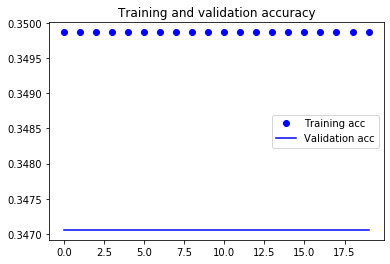

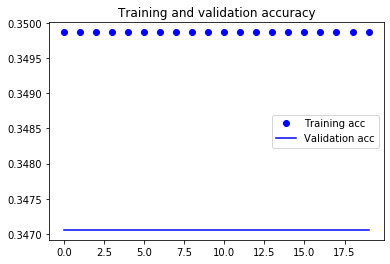

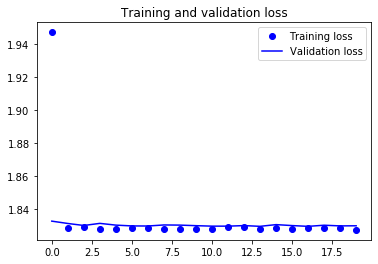

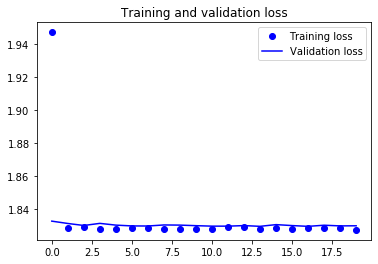

In [81]:
acc = modelF.history['acc']
val_acc = modelF.history['val_acc']
loss = modelF.history['loss']
val_loss = modelF.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [94]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

modelr = models.Sequential()
modelr.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(64, 64, 1)))
modelr.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelr.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelr.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelr.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelr.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelr.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelr.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelr.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelr.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelr.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelr.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelr.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelr.add(layers.Dense(64, activation='relu'))
modelr.add(layers.Dense(64, activation='relu'))
modelr.add(layers.Dense(5, activation='softmax'))

# optimizer:
modelr.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 16
batch_size = 128

modelA = modelr.fit(X_train, r_train, epochs=nb_epoch, batch_size=batch_size,
          validation_data=(X_test, r_test), shuffle=True, verbose=1)

Training....Training....

Train on 17780 samples, validate on 5927 samplesTrain on 17780 samples, validate on 5927 samples

Epoch 1/16
Epoch 1/16


 7296/17780 [===========>..................] - ETA: 11:25 - loss: 1.6092 - acc: 0.1484 - ETA: 11:25 - loss: 1.6092 - acc: 0.1  256/17780 [..............................]  256/17780 [..............................] - ETA: 10:51 - loss: 1.5970 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 10:26 - loss: 1.5582 - acc: 0.3281 - ETA: 10:26 - loss: 1.5582 - acc: 0.3  512/17780 [..............................]  512/17780 [..............................] - ETA: 10:22 - loss: 1.5496 - acc: 0.3  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 10:38 - loss: 1.5423 - acc: 0.3  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 10:29 - loss: 1.5400 - acc: 0.  896/17780 [>.............................]  896/17780 [>.............................] - ETA: 10:26 - loss: 1.5318 - acc: 0.3694 - ETA: 10:26 - loss: 1.5318 - acc: 0. 1024/17780 [>..................

14848/17780 [========================>.....]/17780 [===========>..................] 7552/17780 [===========>..................] - ETA: 7:59 - loss: 1.4377 - acc: 0.4322 - ETA: 7:59 - loss: 1.4377 - acc: 0.43 7680/17780 [===========>..................] 7680/17780 [===========>..................] - ETA: 7:53 - loss: 1.4368 - acc: 0.4329 - ETA: 7:53 - loss: 1.4368 - acc: 0.43 7808/17780 [============>.................] 7808/17780 [============>.................] - ETA: 7:48 - loss: 1.4366 - acc: 0.4329 - ETA: 7:48 - loss: 1.4366 - acc: 0.432 7936/17780 [============>.................] 7936/17780 [============>.................] - ETA: 7:41 - loss: 1.4362 - acc: 0.432 8064/17780 [============>.................] - ETA: 7:41 - loss: 1.4356 - acc: 0.4334 - ETA: 7:41 - loss: 1.4356 - acc: 0.433 8192/17780 [============>.................] 8192/17780 [============>.................] - ETA: 7:33 - loss: 1.4342 - acc: 0.434 8320/17780 [=============>................] 8320/17780 [=============>....

17780/17780 [==============================]ETA: 2:12 - loss: 1.3549 - acc: 0.46615104/17780 [========================>.....]15104/17780 [========================>.....] - ETA: 2:06 - loss: 1.3530 - acc: 0.4615232/17780 [========================>.....]15232/17780 [========================>.....] - ETA: 2:00 - loss: 1.3508 - acc: 0.4686 - ETA: 2:00 - loss: 1.3508 - acc: 0.4615360/17780 [========================>.....]15360/17780 [========================>.....] - ETA: 1:54 - loss: 1.3481 - acc: 0.4697 - ETA: 1:54 - loss: 1.3481 - acc: 0.4615488/17780 [=========================>....]15488/17780 [=========================>....] - ETA: 1:48 - loss: 1.3462 - acc: 0.4706 - ETA: 1:48 - loss: 1.3462 - acc: 0.47015616/17780 [=========================>....] - ETA: 1:42 - loss: 1.3430 - acc: 0.4721 - ETA: 1:42 - loss: 1.3430 - acc: 0.47215744/17780 [=========================>....]15744/17780 [=========================>....] - ETA: 1:36 - loss: 1.3403 - acc: 0.47315872/17780 [=====================

 6144/17780 [=========>....................]  128/17780 [..............................] - ETA: 17:16 - loss: 1.0117 - acc: 0.6328 - ETA: 17:16 - loss: 1.0117 - acc: 0.6  256/17780 [..............................]  256/17780 [..............................] - ETA: 15:50 - loss: 0.9719 - acc: 0. - ETA: 14:48 - loss: 0.9932 - acc: 0.6406 - ETA: 14:48 - loss: 0.9932 - acc: 0.  512/17780 [..............................]  512/17780 [..............................] - ETA: 15:19 - loss: 0.9885 - acc: 0.6406 - ETA: 15:19 - loss: 0.9885 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 15:00 - loss: 1.0216 - acc: 0.6328 - ETA: 15:00 - loss: 1.0216 - acc: 0.  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 15:22 - loss: 1.0180 - acc: 0.6250 - ETA: 15:22 - loss: 1.0180 - acc: 0. - ETA: 15:33 - loss: 0.9965 - acc: 0.6283 - ETA: 15:33 - loss: 0.9965 - acc: 0.6 1024/17780 [>..........................

13568/17780 [=====================>........] - ETA: 9:57 - loss: 1.0081 - acc: 0.6303  - ETA: 9:57 - loss: 1.0081 - acc: 0.630 7168/17780 [===========>..................] 7168/17780 [===========>..................] - ETA: 9:52 - loss: 1.0082 - acc: 0.6299 - ETA: 9:52 - loss: 1.0082 - acc: 0.62 7296/17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 9:48 - loss: 1.0086 - acc: 0.6303 - ETA: 9:48 - loss: 1.0086 - acc: 0.63 7424/17780 [===========>..................] 7424/17780 [===========>..................] - ETA: 9:42 - loss: 1.0075 - acc: 0.6309 - ETA: 9:42 - loss: 1.0075 - acc: 0.63 7552/17780 [===========>..................] 7552/17780 [===========>..................] - ETA: 9:35 - loss: 1.0085 - acc: 0.6308 - ETA: 9:35 - loss: 1.0085 - acc: 0.63 7680/17780 [===========>..................] 7680/17780 [===========>..................] - ETA: 9:32 - loss: 1.0089 - acc: 0.6305 - ETA: 9:32 - loss: 1.0089 - acc: 0.63 7808/17780 [============>........

17152/17780 [===========================>..]ETA: 3:17 - loss: 0.9741 - acc: 0.6414208/17780 [======================>.......]14208/17780 [======================>.......] - ETA: 3:11 - loss: 0.9744 - acc: 0.6458 - ETA: 3:11 - loss: 0.9744 - acc: 0.6414336/17780 [=======================>......]14336/17780 [=======================>......] - ETA: 3:04 - loss: 0.9753 - acc: 0.6456 - ETA: 3:04 - loss: 0.9753 - acc: 0.6414464/17780 [=======================>......]14464/17780 [=======================>......] - ETA: 2:58 - loss: 0.9739 - acc: 0.6464 - ETA: 2:58 - loss: 0.9739 - acc: 0.6414592/17780 [=======================>......]14592/17780 [=======================>......] - ETA: 2:53 - loss: 0.9742 - acc: 0.6462 - ETA: 2:53 - loss: 0.9742 - acc: 0.6414720/17780 [=======================>......]14720/17780 [=======================>......] - ETA: 2:47 - loss: 0.9731 - acc: 0.6467 - ETA: 2:47 - loss: 0.9731 - acc: 0.6414848/17780 [========================>.....]14848/17780 [=======================

 3968/17780 [=====>........................]  128/17780 [..............................] - ETA: 21:18 - loss: 0.7335 - acc: 0.7  256/17780 [..............................]  256/17780 [..............................] - ETA: 23:56 - loss: 0.8550 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 24:07 - loss: 0.8634 - acc: 0.6797 - ETA: 24:07 - loss: 0.8634 - acc: 0.  512/17780 [..............................]  512/17780 [..............................] - ETA: 23:53 - loss: 0.9025 - acc: 0.6758 - ETA: 23:53 - loss: 0.9025 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 23:44 - loss: 0.8524 - acc: 0.7031 - ETA: 23:44 - loss: 0.8524 - acc: 0.  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 24:17 - loss: 0.8495 - acc: 0.7005 - ETA: 24:17 - loss: 0.8495 - acc: 0.  896/17780 [>.............................]  896/17780 [>.................

 - ETA: 7:43 - loss: 0.8233 - acc: 0.7096..] 6656/17780 [==========>...................] - ETA: 17:01 - loss: 0.8348 - acc: 0.7048 - ETA: 17:01 - loss: 0.8348 - acc: 0. 6784/17780 [==========>...................] 6784/17780 [==========>...................] - ETA: 16:49 - loss: 0.8358 - acc: 0.7049 - ETA: 16:49 - loss: 0.8358 - acc: 0.70 - ETA: 16:35 - loss: 0.8376 - acc: 0.70 - ETA: 16:35 - loss: 0.8376 - acc: 0. 7040/17780 [==========>...................] 7040/17780 [==========>...................] - ETA: 16:24 - loss: 0.8356 - acc: 0.7051 - ETA: 16:24 - loss: 0.8356 - acc: 0. 7168/17780 [===========>..................] 7168/17780 [===========>..................] - ETA: 16:10 - loss: 0.8363 - acc: 0.7049 - ETA: 16:10 - loss: 0.8363 - acc: 0. 7296/17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 15:58 - loss: 0.8341 - acc: 0.7053 - ETA: 15:58 - loss: 0.8341 - acc: 0. 7424/17780 [===========>..................] 7424/17780 [===========>...........

 - 1755s 99ms/sample - loss: 0.8023 - acc: 0.7164 - val_loss: 0.8011 - val_acc: 0.7243.] - ETA: 6:20 - loss: 0.8208 - acc: 0.7105 - ETA: 6:20 - loss: 0.8208 - acc: 0.7113696/17780 [======================>.......]13696/17780 [======================>.......] - ETA: 6:08 - loss: 0.8194 - acc: 0.7110 - ETA: 6:08 - loss: 0.8194 - acc: 0.7113824/17780 [======================>.......]13824/17780 [======================>.......] - ETA: 5:56 - loss: 0.8205 - acc: 0.7104 - ETA: 5:56 - loss: 0.8205 - acc: 0.7113952/17780 [======================>.......]13952/17780 [======================>.......] - ETA: 5:45 - loss: 0.8197 - acc: 0.7106 - ETA: 5:45 - loss: 0.8197 - acc: 0.71014080/17780 [======================>.......]14080/17780 [======================>.......] - ETA: 5:33 - loss: 0.8181 - acc: 0.7114208/17780 [======================>.......]14208/17780 [======================>.......] - ETA: 5:22 - loss: 0.8175 - acc: 0.7114 - ETA: 5:22 - loss: 0.8175 - acc: 0.7114336/17780 [===================

 5888/17780 [========>.....................]  128/17780 [..............................] - ETA: 33:03 - loss: 0.7514 - acc: 0.6797 - ETA: 33:03 - loss: 0.7514 - acc: 0.  256/17780 [..............................]  256/17780 [..............................] - ETA: 34:26 - loss: 0.7723 - acc: 0.6953 - ETA: 34:26 - loss: 0.7723 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 34:42 - loss: 0.7863 - acc: 0.6953 - ETA: 34:42 - loss: 0.7863 - acc: 0.6  512/17780 [..............................]  512/17780 [..............................] - ETA: 33:45 - loss: 0.7332 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 33:51 - loss: 0.7407 - acc: 0.7281 - ETA: 33:51 - loss: 0.7407 - acc: 0.  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 33:48 - loss: 0.7273 - acc: 0.7344 - ETA: 33:48 - loss: 0.7273 - acc: 0.  896/17780 [>...................

11776/17780 [==================>...........] 6656/17780 [==========>...................] - ETA: 23:23 - loss: 0.7227 - acc: 0.7428 - ETA: 23:23 - loss: 0.7227 - acc: 0. 6784/17780 [==========>...................] 6784/17780 [==========>...................] - ETA: 23:08 - loss: 0.7234 - acc: 0.7417 - ETA: 23:08 - loss: 0.7234 - acc: 0. 6912/17780 [==========>...................] 6912/17780 [==========>...................] - ETA: 22:52 - loss: 0.7220 - acc: 0.7423 - ETA: 22:52 - loss: 0.7220 - acc: 0. 7040/17780 [==========>...................] 7040/17780 [==========>...................] - ETA: 22:35 - loss: 0.7217 - acc: 0.7429 - ETA: 22:35 - loss: 0.7217 - acc: 0. 7168/17780 [===========>..................] 7168/17780 [===========>..................] - ETA: 22:19 - loss: 0.7249 - acc: 0.7426 - ETA: 22:19 - loss: 0.7249 - acc: 0. 7296/17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 22:02 - loss: 0.7253 - acc: 0.7429 - ETA: 22:02 - loss: 0.7253 -

17780/17780 [==============================]ETA: 9:22 - loss: 0.7221 - acc: 0.7413440/17780 [=====================>........]13440/17780 [=====================>........] - ETA: 9:06 - loss: 0.7205 - acc: 0.7452 - ETA: 9:06 - loss: 0.7205 - acc: 0.7413568/17780 [=====================>........]13568/17780 [=====================>........] - ETA: 8:50 - loss: 0.7205 - acc: 0.7454 - ETA: 8:50 - loss: 0.7205 - acc: 0.7413696/17780 [======================>.......]13696/17780 [======================>.......] - ETA: 8:34 - loss: 0.7192 - acc: 0.7463 - ETA: 8:34 - loss: 0.7192 - acc: 0.7413824/17780 [======================>.......]13824/17780 [======================>.......] - ETA: 8:18 - loss: 0.7183 - acc: 0.7467 - ETA: 8:18 - loss: 0.7183 - acc: 0.7413952/17780 [======================>.......]13952/17780 [======================>.......] - ETA: 8:02 - loss: 0.7186 - acc: 0.7466 - ETA: 8:02 - loss: 0.7186 - acc: 0.7414080/17780 [======================>.......]14080/17780 [======================>

 6912/17780 [==========>...................]  128/17780 [..............................] - ETA: 32:57 - loss: 0.6114 - acc: 0.7891 - ETA: 32:57 - loss: 0.6114 - acc: 0.  256/17780 [..............................]  256/17780 [..............................] - ETA: 32:16 - loss: 0.6024 - acc: 0.8047 - ETA: 32:16 - loss: 0.6024 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 31:54 - loss: 0.6351 - acc: 0.7734 - ETA: 31:54 - loss: 0.6351 - acc: 0.  512/17780 [..............................]  512/17780 [..............................] - ETA: 32:02 - loss: 0.6444 - acc: 0.7754 - ETA: 32:02 - loss: 0.6444 - acc: 0.7  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 31:31 - loss: 0.6623 - acc: 0.7  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 31:31 - loss: 0.6468 - acc: 0.  896/17780 [>.............................]  896/17780 [>................

 - ETA: 6:57 - loss: 0.6666 - acc: 0.7676..]] 7168/17780 [===========>..................] - ETA: 19:36 - loss: 0.6416 - acc: 0. 7296/17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 19:21 - loss: 0.6404 - acc: 0.7771 - ETA: 19:21 - loss: 0.6404 - acc: 0.7 7424/17780 [===========>..................] - ETA: 19:07 - loss: 0.6414 - acc: 0.7765 - ETA: 19:07 - loss: 0.6414 - acc: 0. 7552/17780 [===========>..................] 7552/17780 [===========>..................] - ETA: 18:53 - loss: 0.6410 - acc: 0.7765 - ETA: 18:53 - loss: 0.6410 - acc: 0. 7680/17780 [===========>..................] 7680/17780 [===========>..................] - ETA: 18:38 - loss: 0.6397 - acc: 0.7764 - ETA: 18:38 - loss: 0.6397 - acc: 0. 7808/17780 [============>.................] 7808/17780 [============>.................] - ETA: 18:23 - loss: 0.6408 - acc: 0.7761 - ETA: 18:23 - loss: 0.6408 - acc: 0. 7936/17780 [============>.................] 7936/17780 [============>......

 - ETA: 12s - loss: 0.6631 - acc: 0.7694=>.]ETA: 6:43 - loss: 0.6677 - acc: 0.7614208/17780 [======================>.......]14208/17780 [======================>.......] - ETA: 6:29 - loss: 0.6669 - acc: 0.7675 - ETA: 6:29 - loss: 0.6669 - acc: 0.76714336/17780 [=======================>......] - ETA: 6:15 - loss: 0.6664 - acc: 0.7677 - ETA: 6:15 - loss: 0.6664 - acc: 0.7614464/17780 [=======================>......]14464/17780 [=======================>......] - ETA: 6:01 - loss: 0.6668 - acc: 0.7675 - ETA: 6:01 - loss: 0.6668 - acc: 0.7614592/17780 [=======================>......]14592/17780 [=======================>......] - ETA: 5:47 - loss: 0.6663 - acc: 0.7675 - ETA: 5:47 - loss: 0.6663 - acc: 0.7614720/17780 [=======================>......]14720/17780 [=======================>......] - ETA: 5:33 - loss: 0.6680 - acc: 0.7668 - ETA: 5:33 - loss: 0.6680 - acc: 0.7614848/17780 [========================>.....]14848/17780 [========================>.....] - ETA: 5:19 - loss: 0.6670 - acc: 

 - ETA: 23:29 - loss: 0.5986 - acc: 0.7997.]  128/17780 [..............................] - ETA: 30:45 - loss: 0.5296 - acc: 0.8359 - ETA: 30:45 - loss: 0.5296 - acc: 0.  256/17780 [..............................]  256/17780 [..............................] - ETA: 32:02 - loss: 0.6031 - acc: 0.7812 - ETA: 32:02 - loss: 0.6031 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 31:13 - loss: 0.6586 - acc: 0.7760 - ETA: 31:13 - loss: 0.6586 - acc: 0.7  512/17780 [..............................]  512/17780 [..............................] - ETA: 31:05 - loss: 0.6462 - acc: 0.7  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 31:00 - loss: 0.6417 - acc: 0.  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 30:39 - loss: 0.6291 - acc: 0.7930 - ETA: 30:39 - loss: 0.6291 - acc: 0.  896/17780 [>.............................]  896/17780 [>................

 - ETA: 7:55 - loss: 0.5885 - acc: 0.7988..] ETA: 22:28 - loss: 0.5986 - acc: 0. 6912/17780 [==========>...................] 6912/17780 [==========>...................] - ETA: 22:12 - loss: 0.5990 - acc: 0.7990 - ETA: 22:12 - loss: 0.5990 - acc: 0.79 - ETA: 21:56 - loss: 0.5985 - acc: 0.79 - ETA: 21:56 - loss: 0.5985 - acc: 0. 7168/17780 [===========>..................] 7168/17780 [===========>..................] - ETA: 21:40 - loss: 0.5985 - acc: 0.7987 - ETA: 21:40 - loss: 0.5985 - acc: 0. 7296/17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 21:23 - loss: 0.5979 - acc: 0.7991 - ETA: 21:23 - loss: 0.5979 - acc: 0. 7424/17780 [===========>..................] 7424/17780 [===========>..................] - ETA: 21:07 - loss: 0.5979 - acc: 0.7985 - ETA: 21:07 - loss: 0.5979 - acc: 0. 7552/17780 [===========>..................] 7552/17780 [===========>..................] - ETA: 20:51 - loss: 0.5940 - acc: 0.8002 - ETA: 20:51 - loss: 0.5940 - acc: 0.

17780/17780 [==============================]14080/17780 [======================>.......] - ETA: 7:24 - loss: 0.5898 - acc: 0.7984 - ETA: 7:24 - loss: 0.5898 - acc: 0.79814208/17780 [======================>.......]14208/17780 [======================>.......] - ETA: 7:09 - loss: 0.5897 - acc: 0.7914336/17780 [=======================>......]14336/17780 [=======================>......] - ETA: 6:53 - loss: 0.5903 - acc: 0.7979 - ETA: 6:53 - loss: 0.5903 - acc: 0.7914464/17780 [=======================>......]14464/17780 [=======================>......] - ETA: 6:38 - loss: 0.5897 - acc: 0.7983 - ETA: 6:38 - loss: 0.5897 - acc: 0.79814592/17780 [=======================>......]14592/17780 [=======================>......] - ETA: 6:22 - loss: 0.5899 - acc: 0.7914720/17780 [=======================>......]14720/17780 [=======================>......] - ETA: 6:07 - loss: 0.5906 - acc: 0.7976 - ETA: 6:07 - loss: 0.5906 - acc: 0.79714848/17780 [========================>.....]14848/17780 [==============

 6784/17780 [==========>...................]  128/17780 [..............................] - ETA: 36:52 - loss: 0.4816 - acc: 0.8359 - ETA: 36:52 - loss: 0.4816 - acc: 0.8  256/17780 [..............................] - ETA: 33:49 - loss: 0.4998 - acc: 0.8633 - ETA: 33:49 - loss: 0.4998 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 33:15 - loss: 0.5176 - acc: 0.8411 - ETA: 33:15 - loss: 0.5176 - acc: 0.  512/17780 [..............................]  512/17780 [..............................] - ETA: 33:42 - loss: 0.5270 - acc: 0.8320 - ETA: 33:42 - loss: 0.5270 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 33:23 - loss: 0.5215 - acc: 0.8266 - ETA: 33:23 - loss: 0.5215 - acc: 0.  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 33:12 - loss: 0.5194 - acc: 0.8281 - ETA: 33:12 - loss: 0.5194 - acc: 0.  896/17780 [>.....................

 - ETA: 8:04 - loss: 0.5442 - acc: 0.8128..] ETA: 21:08 - loss: 0.5360 - acc: 0. 6912/17780 [==========>...................] 6912/17780 [==========>...................] - ETA: 20:53 - loss: 0.5374 - acc: 0.8135 - ETA: 20:53 - loss: 0.5374 - acc: 0. 7040/17780 [==========>...................] 7040/17780 [==========>...................] - ETA: 20:38 - loss: 0.5394 - acc: 0.8124 - ETA: 20:38 - loss: 0.5394 - acc: 0. 7168/17780 [===========>..................] 7168/17780 [===========>..................] - ETA: 20:25 - loss: 0.5402 - acc: 0.8122 - ETA: 20:25 - loss: 0.5402 - acc: 0. 7296/17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 20:08 - loss: 0.5406 - acc: 0.8124 - ETA: 20:08 - loss: 0.5406 - acc: 0.8 7424/17780 [===========>..................] - ETA: 19:54 - loss: 0.5392 - acc: 0.8132 - ETA: 19:54 - loss: 0.5392 - acc: 0. 7552/17780 [===========>..................] 7552/17780 [===========>..................] - ETA: 19:40 - loss: 0.5366 - acc:

17780/17780 [==============================]13824/17780 [======================>.......] - ETA: 7:35 - loss: 0.5443 - acc: 0.8123 - ETA: 7:35 - loss: 0.5443 - acc: 0.81213952/17780 [======================>.......] - ETA: 7:20 - loss: 0.5441 - acc: 0.8124 - ETA: 7:20 - loss: 0.5441 - acc: 0.81214080/17780 [======================>.......] - ETA: 7:06 - loss: 0.5442 - acc: 0.8122 - ETA: 7:06 - loss: 0.5442 - acc: 0.81214208/17780 [======================>.......] - ETA: 6:51 - loss: 0.5442 - acc: 0.8123 - ETA: 6:51 - loss: 0.5442 - acc: 0.8114336/17780 [=======================>......]14336/17780 [=======================>......] - ETA: 6:36 - loss: 0.5443 - acc: 0.8123 - ETA: 6:36 - loss: 0.5443 - acc: 0.81214464/17780 [=======================>......]14464/17780 [=======================>......] - ETA: 6:21 - loss: 0.5433 - acc: 0.8114592/17780 [=======================>......] - ETA: 6:06 - loss: 0.5417 - acc: 0.8114720/17780 [=======================>......]14720/17780 [=====================

 - ETA: 22:23 - loss: 0.4845 - acc: 0.8288.] - ETA: 31:33 - loss: 0.4627 - acc: 0.8516 - ETA: 31:33 - loss: 0.4627 - acc: 0.8  256/17780 [..............................] - ETA: 32:26 - loss: 0.4548 - acc: 0.8633 - ETA: 32:26 - loss: 0.4548 - acc: 0.8  384/17780 [..............................] - ETA: 32:52 - loss: 0.4650 - acc: 0.8542 - ETA: 32:52 - loss: 0.4650 - acc: 0.  512/17780 [..............................]  512/17780 [..............................] - ETA: 33:02 - loss: 0.4631 - acc: 0.8535 - ETA: 33:02 - loss: 0.4631 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 32:45 - loss: 0.4539 - acc: 0.8547 - ETA: 32:45 - loss: 0.4539 - acc: 0.8  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 32:22 - loss: 0.4562 - acc: 0.8  896/17780 [>.............................] - ETA: 31:54 - loss: 0.4536 - acc: 0.8538 - ETA: 31:54 - loss: 0.4536 - acc: 0. 1024/17780 [>........................

 - ETA: 7:13 - loss: 0.4898 - acc: 0.8296 .] 7040/17780 [==========>...................] - ETA: 20:10 - loss: 0.4794 - acc: 0.8298 - ETA: 20:10 - loss: 0.4794 - acc: 0. 7168/17780 [===========>..................] 7168/17780 [===========>..................] - ETA: 19:54 - loss: 0.4810 - acc: 0.8297 - ETA: 19:54 - loss: 0.4810 - acc: 0. 7296/17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 19:38 - loss: 0.4830 - acc: 0.8291 - ETA: 19:38 - loss: 0.4830 - acc: 0. 7424/17780 [===========>..................] 7424/17780 [===========>..................] - ETA: 19:24 - loss: 0.4833 - acc: 0.8288 - ETA: 19:24 - loss: 0.4833 - acc: 0.8 7552/17780 [===========>..................] - ETA: 19:09 - loss: 0.4830 - acc: 0.8293 - ETA: 19:09 - loss: 0.4830 - acc: 0. 7680/17780 [===========>..................] 7680/17780 [===========>..................] - ETA: 18:55 - loss: 0.4814 - acc: 0.8294 - ETA: 18:55 - loss: 0.4814 - acc: 0.8 7808/17780 [============>........

 - ETA: 12s - loss: 0.4935 - acc: 0.8282>..]ETA: 6:45 - loss: 0.4904 - acc: 0.8214208/17780 [======================>.......]14208/17780 [======================>.......] - ETA: 6:31 - loss: 0.4898 - acc: 0.8297 - ETA: 6:31 - loss: 0.4898 - acc: 0.82914336/17780 [=======================>......] - ETA: 6:17 - loss: 0.4903 - acc: 0.8292 - ETA: 6:17 - loss: 0.4903 - acc: 0.8214464/17780 [=======================>......]14464/17780 [=======================>......] - ETA: 6:03 - loss: 0.4902 - acc: 0.8291 - ETA: 6:03 - loss: 0.4902 - acc: 0.82914592/17780 [=======================>......]14592/17780 [=======================>......] - ETA: 5:48 - loss: 0.4910 - acc: 0.82814720/17780 [=======================>......]14720/17780 [=======================>......] - ETA: 5:34 - loss: 0.4908 - acc: 0.8214848/17780 [========================>.....]14848/17780 [========================>.....] - ETA: 5:20 - loss: 0.4905 - acc: 0.8287 - ETA: 5:20 - loss: 0.4905 - acc: 0.8214976/17780 [======================

 - ETA: 19:14 - loss: 0.4239 - acc: 0.8545.]  128/17780 [..............................] - ETA: 30:30 - loss: 0.5215 - acc: 0.8  256/17780 [..............................]  256/17780 [..............................] - ETA: 29:50 - loss: 0.4452 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 30:09 - loss: 0.4389 - acc: 0.8568 - ETA: 30:09 - loss: 0.4389 - acc: 0.  512/17780 [..............................]  512/17780 [..............................] - ETA: 30:19 - loss: 0.4336 - acc: 0.8555 - ETA: 30:19 - loss: 0.4336 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 30:12 - loss: 0.4618 - acc: 0.8422 - ETA: 30:12 - loss: 0.4618 - acc: 0.  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 30:09 - loss: 0.4457 - acc: 0.8490 - ETA: 30:09 - loss: 0.4457 - acc: 0.  896/17780 [>.............................]  896/17780 [>.................

12672/17780 [====================>.........]17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 18:32 - loss: 0.4244 - acc: 0.8533 - ETA: 18:32 - loss: 0.4244 - acc: 0. 7424/17780 [===========>..................] 7424/17780 [===========>..................] - ETA: 18:19 - loss: 0.4252 - acc: 0.8530 - ETA: 18:19 - loss: 0.4252 - acc: 0. 7552/17780 [===========>..................] 7552/17780 [===========>..................] - ETA: 18:06 - loss: 0.4250 - acc: 0.8530 - ETA: 18:06 - loss: 0.4250 - acc: 0.8 7680/17780 [===========>..................] 7680/17780 [===========>..................] - ETA: 17:52 - loss: 0.4248 - acc: 0. 7808/17780 [============>.................] - ETA: 17:38 - loss: 0.4256 - acc: 0.8526 7808/17780 [============>.................] - ETA: 17:38 - loss: 0.4256 - acc: 0. 7936/17780 [============>.................] 7936/17780 [============>.................] - ETA: 17:24 - loss: 0.4251 - acc: 0.8527 - ETA: 17:24 - loss: 0.4251 - ac

 - 2122s 119ms/sample - loss: 0.4358 - acc: 0.8479 - val_loss: 0.6702 - val_acc: 0.76857780 [=======================>......]14336/17780 [=======================>......] - ETA: 6:08 - loss: 0.4313 - acc: 0.8492 - ETA: 6:08 - loss: 0.4313 - acc: 0.8414464/17780 [=======================>......]14464/17780 [=======================>......] - ETA: 5:54 - loss: 0.4311 - acc: 0.8490 - ETA: 5:54 - loss: 0.4311 - acc: 0.84914592/17780 [=======================>......] - ETA: 5:41 - loss: 0.4307 - acc: 0.8493 - ETA: 5:41 - loss: 0.4307 - acc: 0.84914720/17780 [=======================>......]14720/17780 [=======================>......] - ETA: 5:28 - loss: 0.4292 - acc: 0.84914848/17780 [========================>.....]14848/17780 [========================>.....] - ETA: 5:14 - loss: 0.4299 - acc: 0.84914976/17780 [========================>.....]14976/17780 [========================>.....] - ETA: 5:01 - loss: 0.4295 - acc: 0.8415104/17780 [========================>.....]15104/17780 [==================

 - ETA: 23:22 - loss: 0.3742 - acc: 0.8708.]  128/17780 [..............................] - ETA: 34:47 - loss: 0.4033 - acc: 0.  256/17780 [..............................]  256/17780 [..............................] - ETA: 33:42 - loss: 0.4295 - acc: 0.8516 - ETA: 33:42 - loss: 0.4295 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 33:18 - loss: 0.4274 - acc: 0.8411 - ETA: 33:18 - loss: 0.4274 - acc: 0.  512/17780 [..............................]  512/17780 [..............................] - ETA: 33:20 - loss: 0.4273 - acc: 0.8496 - ETA: 33:20 - loss: 0.4273 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 33:08 - loss: 0.4555 - acc: 0.8344 - ETA: 33:08 - loss: 0.4555 - acc: 0.8  768/17780 [>.............................] - ETA: 32:52 - loss: 0.4288 - acc: 0.8464 - ETA: 32:52 - loss: 0.4288 - acc: 0.8  896/17780 [>.............................]  896/17780 [>..................

12672/17780 [====================>.........]784/17780 [==========>...................] - ETA: 21:39 - loss: 0.3757 - acc: 0. 6912/17780 [==========>...................] 6912/17780 [==========>...................] - ETA: 21:24 - loss: 0.3761 - acc: 0.8686 - ETA: 21:24 - loss: 0.3761 - acc: 0. 7040/17780 [==========>...................] 7040/17780 [==========>...................] - ETA: 21:08 - loss: 0.3748 - acc: 0.8693 - ETA: 21:08 - loss: 0.3748 - acc: 0. 7168/17780 [===========>..................] 7168/17780 [===========>..................] - ETA: 20:53 - loss: 0.3745 - acc: 0.8696 - ETA: 20:53 - loss: 0.3745 - acc: 0. 7296/17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 20:38 - loss: 0.3742 - acc: 0.8697 - ETA: 20:38 - loss: 0.3742 - acc: 0. 7424/17780 [===========>..................] 7424/17780 [===========>..................] - ETA: 20:23 - loss: 0.3750 - acc: 0.8691 - ETA: 20:23 - loss: 0.3750 - acc: 0. 7552/17780 [===========>...........

17280/17780 [============================>.]ETA: 8:23 - loss: 0.3829 - acc: 0.8613568/17780 [=====================>........]13568/17780 [=====================>........] - ETA: 8:08 - loss: 0.3824 - acc: 0.8664 - ETA: 8:08 - loss: 0.3824 - acc: 0.8613696/17780 [======================>.......]13696/17780 [======================>.......] - ETA: 7:53 - loss: 0.3843 - acc: 0.8659 - ETA: 7:53 - loss: 0.3843 - acc: 0.865 - ETA: 7:38 - loss: 0.3837 - acc: 0.865 - ETA: 7:38 - loss: 0.3837 - acc: 0.8613952/17780 [======================>.......]13952/17780 [======================>.......] - ETA: 7:23 - loss: 0.3834 - acc: 0.8659 - ETA: 7:23 - loss: 0.3834 - acc: 0.8614080/17780 [======================>.......]14080/17780 [======================>.......] - ETA: 7:08 - loss: 0.3841 - acc: 0.8654 - ETA: 7:08 - loss: 0.3841 - acc: 0.8614208/17780 [======================>.......]14208/17780 [======================>.......] - ETA: 6:53 - loss: 0.3848 - acc: 0.8651 - ETA: 6:53 - loss: 0.3848 - acc: 0.86

 - ETA: 24:20 - loss: 0.2837 - acc: 0.8958.]  128/17780 [..............................] - ETA: 32:01 - loss: 0.3371 - acc: 0.8984 - ETA: 32:01 - loss: 0.3371 - acc: 0.  256/17780 [..............................]  256/17780 [..............................] - ETA: 31:50 - loss: 0.2939 - acc: 0.9023 - ETA: 31:50 - loss: 0.2939 - acc: 0.9  384/17780 [..............................]  384/17780 [..............................] - ETA: 32:03 - loss: 0.3293 - acc: 0.8  512/17780 [..............................]  512/17780 [..............................] - ETA: 32:34 - loss: 0.3167 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 32:09 - loss: 0.3332 - acc: 0.8844 - ETA: 32:09 - loss: 0.3332 - acc: 0.  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 32:01 - loss: 0.3141 - acc: 0.8932 - ETA: 32:01 - loss: 0.3141 - acc: 0.  896/17780 [>.............................]  896/17780 [>................

 - ETA: 7:49 - loss: 0.3168 - acc: 0.8873..] ETA: 20:56 - loss: 0.2896 - acc: 0. 6912/17780 [==========>...................] 6912/17780 [==========>...................] - ETA: 20:41 - loss: 0.2905 - acc: 0.8964 - ETA: 20:41 - loss: 0.2905 - acc: 0. 7040/17780 [==========>...................] 7040/17780 [==========>...................] - ETA: 20:27 - loss: 0.2905 - acc: 0.8967 - ETA: 20:27 - loss: 0.2905 - acc: 0.89 - ETA: 20:11 - loss: 0.2903 - acc: 0.89 - ETA: 20:11 - loss: 0.2903 - acc: 0.89 - ETA: 19:57 - loss: 0.2915 - acc: 0.89 - ETA: 19:57 - loss: 0.2915 - acc: 0. 7424/17780 [===========>..................] 7424/17780 [===========>..................] - ETA: 19:41 - loss: 0.2921 - acc: 0.8959 - ETA: 19:41 - loss: 0.2921 - acc: 0. 7552/17780 [===========>..................] 7552/17780 [===========>..................] - ETA: 19:27 - loss: 0.2918 - acc: 0.8962 - ETA: 19:27 - loss: 0.2918 - acc: 0.89 - ETA: 19:12 - loss: 0.2916 - acc: 0.89 - ETA: 19:12 - loss: 0.2916 - acc: 0. 7808/17

 - 2230s 125ms/sample - loss: 0.3256 - acc: 0.8843 - val_loss: 0.8131 - val_acc: 0.7650] - ETA: 7:35 - loss: 0.3175 - acc: 0.8870 - ETA: 7:35 - loss: 0.3175 - acc: 0.8813952/17780 [======================>.......]13952/17780 [======================>.......] - ETA: 7:20 - loss: 0.3182 - acc: 0.8866 - ETA: 7:20 - loss: 0.3182 - acc: 0.8814080/17780 [======================>.......]14080/17780 [======================>.......] - ETA: 7:05 - loss: 0.3182 - acc: 0.8867 - ETA: 7:05 - loss: 0.3182 - acc: 0.8814208/17780 [======================>.......]14208/17780 [======================>.......] - ETA: 6:51 - loss: 0.3185 - acc: 0.8867 - ETA: 6:51 - loss: 0.3185 - acc: 0.8814336/17780 [=======================>......]14336/17780 [=======================>......] - ETA: 6:37 - loss: 0.3183 - acc: 0.8868 - ETA: 6:37 - loss: 0.3183 - acc: 0.8814464/17780 [=======================>......]14464/17780 [=======================>......] - ETA: 6:22 - loss: 0.3182 - acc: 0.8868 - ETA: 6:22 - loss: 0.3182 - a

 7040/17780 [==========>...................]  128/17780 [..............................] - ETA: 33:15 - loss: 0.1720 - acc: 0.9609 - ETA: 33:15 - loss: 0.1720 - acc: 0.9  256/17780 [..............................]  256/17780 [..............................] - ETA: 32:28 - loss: 0.2385 - acc: 0. - ETA: 34:39 - loss: 0.2348 - acc: 0.9271 - ETA: 34:39 - loss: 0.2348 - acc: 0.9  512/17780 [..............................]  512/17780 [..............................] - ETA: 33:24 - loss: 0.2472 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 33:07 - loss: 0.2438 - acc: 0.9141 - ETA: 33:07 - loss: 0.2438 - acc: 0.  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 32:27 - loss: 0.2345 - acc: 0.9180 - ETA: 32:27 - loss: 0.2345 - acc: 0.  896/17780 [>.............................]  896/17780 [>.............................] - ETA: 31:59 - loss: 0.2346 - acc: 0.9174 - ETA: 31:59 - loss: 0.2346 - a

12160/17780 [===================>..........] ETA: 19:32 - loss: 0.2461 - acc: 0. 7296/17780 [===========>..................] 7296/17780 [===========>..................] - ETA: 19:17 - loss: 0.2462 - acc: 0.9152 - ETA: 19:17 - loss: 0.2462 - acc: 0.91 - ETA: 19:03 - loss: 0.2464 - acc: 0.91 - ETA: 19:03 - loss: 0.2464 - acc: 0. 7552/17780 [===========>..................] 7552/17780 [===========>..................] - ETA: 18:47 - loss: 0.2468 - acc: 0.9138 - ETA: 18:47 - loss: 0.2468 - acc: 0. 7680/17780 [===========>..................] 7680/17780 [===========>..................] - ETA: 18:34 - loss: 0.2476 - acc: 0.9137 - ETA: 18:34 - loss: 0.2476 - acc: 0. 7808/17780 [============>.................] 7808/17780 [============>.................] - ETA: 18:19 - loss: 0.2467 - acc: 0.9141 - ETA: 18:19 - loss: 0.2467 - acc: 0.91 - ETA: 18:04 - loss: 0.2473 - acc: 0.91 - ETA: 18:04 - loss: 0.2473 - acc: 0.91 - ETA: 17:50 - loss: 0.2474 - acc: 0.91 - ETA: 17:50 - loss: 0.2474 - acc: 0. 8192/17

 - ETA: 12s - loss: 0.2778 - acc: 0.9022=>.] - ETA: 6:47 - loss: 0.2749 - acc: 0.903 - ETA: 6:47 - loss: 0.2749 - acc: 0.9014208/17780 [======================>.......]14208/17780 [======================>.......] - ETA: 6:33 - loss: 0.2741 - acc: 0.9039 - ETA: 6:33 - loss: 0.2741 - acc: 0.90 - ETA: 6:19 - loss: 0.2741 - acc: 0.9039 - ETA: 6:19 - loss: 0.2741 - acc: 0.9014464/17780 [=======================>......]14464/17780 [=======================>......] - ETA: 6:05 - loss: 0.2750 - acc: 0.9036 - ETA: 6:05 - loss: 0.2750 - acc: 0.9014592/17780 [=======================>......]14592/17780 [=======================>......] - ETA: 5:51 - loss: 0.2745 - acc: 0.9038 - ETA: 5:51 - loss: 0.2745 - acc: 0.9014720/17780 [=======================>......] - ETA: 5:37 - loss: 0.2748 - acc: 0.9014848/17780 [========================>.....]14848/17780 [========================>.....] - ETA: 5:23 - loss: 0.2752 - acc: 0.9034 - ETA: 5:23 - loss: 0.2752 - acc: 0.903 - ETA: 5:08 - loss: 0.2757 - acc: 0.903 

 - ETA: 20:33 - loss: 0.2257 - acc: 0.9202.]  128/17780 [..............................] - ETA: 21:59 - loss: 0.2254 - acc: 0.  256/17780 [..............................]  256/17780 [..............................] - ETA: 20:35 - loss: 0.2172 - acc: 0.9297 - ETA: 20:35 - loss: 0.2172 - acc: 0.  384/17780 [..............................]  384/17780 [..............................] - ETA: 21:34 - loss: 0.2182 - acc: 0.9167 - ETA: 21:34 - loss: 0.2182 - acc: 0.  512/17780 [..............................]  512/17780 [..............................] - ETA: 22:41 - loss: 0.2037 - acc: 0.9238 - ETA: 22:41 - loss: 0.2037 - acc: 0.  640/17780 [>.............................]  640/17780 [>.............................] - ETA: 22:20 - loss: 0.2038 - acc: 0.9250 - ETA: 22:20 - loss: 0.2038 - acc: 0.  768/17780 [>.............................]  768/17780 [>.............................] - ETA: 22:32 - loss: 0.1982 - acc: 0.9271 - ETA: 22:32 - loss: 0.1982 - acc: 0.  896/17780 [>....................

KeyboardInterrupt: 

KeyboardInterrupt: 

In [95]:
modelr.save('race_1')

# from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

modelg = models.Sequential()
modelg.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(64, 64, 1)))
modelg.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelg.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelg.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelg.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelg.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelg.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelg.add(layers.Dense(64, activation='relu'))
modelg.add(layers.Dense(64, activation='relu'))
modelg.add(layers.Dense(2, activation='softmax'))

# optimizer:
modelg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 16
batch_size = 128

modelB = modelg.fit(X_train, r_train, epochs=nb_epoch, batch_size=batch_size,
          validation_data=(X_test, r_test), shuffle=True, verbose=1)

In [ ]:
modelg.save('race_1')

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

modela = models.Sequential()
modela.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(64, 64, 1)))
modela.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modela.add(layers.MaxPooling2D(pool_size=(2, 2)))

modela.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modela.add(layers.MaxPooling2D(pool_size=(2, 2)))

modela.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modela.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modela.add(layers.MaxPooling2D(pool_size=(2, 2)))

modela.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modela.add(layers.Dense(64, activation='relu'))
modela.add(layers.Dense(64, activation='relu'))
modela.add(layers.Dense(2, activation='softmax'))

# optimizer:
modela.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Training....')


#fit
nb_epoch = 16
batch_size = 128

modelC = modela.fit(X_train, r_train, epochs=nb_epoch, batch_size=batch_size,
          validation_data=(X_test, r_test), shuffle=True, verbose=1)

In [ ]:
modelg.save('race_1')